In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
from network.models.building_blocks.resnet import resnet34
from network.coil_model import CoILModel
from input.coil_dataset import CoILDataset
from torch.autograd import Variable
from configs.coil_global import _g_conf
from ipywidgets import interact
from IPython import display
from scipy.misc import imresize, imread
from glob import glob
import time
import torch
import os

In [30]:
def get_image(index, iscomplex=True):
    if iscomplex:
        imgpath = '/home/eder/Downloads/attention_data/Atention/'
    else:
        imgpath = '/home/eder/Downloads/attention_data/NoAttention/'
    
    img = glob(os.path.join(imgpath, '*.png'))[index]
    
    Img = imread(img)/255.
    return Img, Variable(torch.from_numpy(Img.transpose(2, 0, 1)).unsqueeze(0)).float().cuda()

In [115]:
from configs import g_conf, merge_with_yaml
g_conf.immutable(False)
exp_batch = 'resnet_34'
exp_alias = 'less_drop50'
merge_with_yaml(os.path.join('/home/eder/felipecode/CoIL/configs', 'resnet_34', exp_alias + '.yaml'))

In [116]:
model = CoILModel(g_conf.MODEL_TYPE, g_conf.MODEL_CONFIGURATION)

In [109]:
checkpoint = torch.load(os.path.join('/home/eder/felipecode/CoIL/_logs', exp_batch, exp_alias
                                     , 'checkpoints', '300000.pth'))

In [139]:
checkpoint = torch.load('/home/eder/felipecode/CoIL/_logs/attention_tests/resnet_attention/checkpoints/100000.pth')

In [140]:
model.load_state_dict(checkpoint['state_dict'])

In [141]:
model = model.cuda()
model = model.eval()

In [143]:
def forward(self, x):
    print (x.shape)
    x = self.conv1(x)
    print ('conv1', x.shape)
    x = self.bn1(x)
    x = self.relu(x)
    print (x.shape)
    x = self.maxpool(x)
    print (x.shape)

    x1 = self.layer1(x)
    print ('layer1', x1.shape)
    x2 = self.layer2(x1)
    print ('layer2', x2.shape)
    x3 = self.layer3(x2)
    print ('layer3', x3.shape)
    x4 = self.layer4(x3)
    print ('layer4', x4.shape)

    x5 = self.avgpool(x4)
    print ('layer5', x5.shape)
    x = x5.view(x.size(0), -1)
    print ('layer6', x.shape)
    x = self.fc(x)
    print ('layer7', x.shape)
    
    return x, x1, x2, x3, x4, x5

/home/eder/anaconda3/envs/coil_tri/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


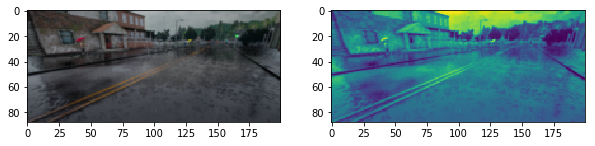

In [144]:
fig, (ax1, ax2) = subplots(1, 2)

img, _ = get_image(0)
p1 = ax1.imshow(img)
p2 = ax2.imshow(img[:, :, 0])

In [145]:
def make_image(index):
    img, X = get_image(index, iscomplex=True)
    p1.set_data(img)
    
    Y = forward(model.perception, X)
    att = torch.abs(Y[1]).sum(1)[0].data.cpu().numpy()
    att = imresize(att, [88, 200])
    # p2.set_data(att)
    p2.set_data(att)
    p2.set_clim(att.min(), att.max())
    display.clear_output(wait=True)
    figsize(10, 10)
    # display.display(fig)
    return fig

_ = interact(make_image, index=(0, 100-1))

interactive(children=(IntSlider(value=49, description='index', max=99), Output()), _dom_classes=('widget-inter…

In [106]:
l1norm, l2norm = [], []
for i in range(100):
    img, X = get_image(i)
    Y = forward(model.perception, X)
    att = torch.abs(Y[1]**2).sum(1)[0].data.cpu().numpy()
    att = att / abs(att).max()
    l1norm.append(np.linalg.norm(att, 1))
    l2norm.append(np.linalg.norm(att, 2))

/home/eder/anaconda3/envs/coil_tri/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
laye

layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size

layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 512])
torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size(

In [107]:
print("random model: ", np.mean(l1norm), np.mean(l2norm))

random model:  8.29878 9.693132


In [99]:
print("trained model: ", np.mean(l1norm), np.mean(l2norm))

trained model:  5.639225 5.4417458
